In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
%matplotlib inline

pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 300

## Predicting "Greenness" Of Content

This dataset comes from [stumbleupon](https://www.stumbleupon.com/), a web page recommender and was made available [here](https://www.kaggle.com/c/stumbleupon/download/train.tsv)

A description of the columns is below

FieldName|Type|Description
---------|----|-----------
url|string|Url of the webpage to be classified
urlid|integer| StumbleUpon's unique identifier for each url
boilerplate|json|Boilerplate text
alchemy_category|string|Alchemy category (per the publicly available Alchemy API found at www.alchemyapi.com)
alchemy_category_score|double|Alchemy category score (per the publicly available Alchemy API found at www.alchemyapi.com)
avglinksize| double|Average number of words in each link
commonLinkRatio_1|double|# of links sharing at least 1 word with 1 other links / # of links
commonLinkRatio_2|double|# of links sharing at least 1 word with 2 other links / # of links
commonLinkRatio_3|double|# of links sharing at least 1 word with 3 other links / # of links
commonLinkRatio_4|double|# of links sharing at least 1 word with 4 other links / # of links
compression_ratio|double|Compression achieved on this page via gzip (measure of redundancy)
embed_ratio|double|Count of number of <embed> usage
frameBased|integer (0 or 1)|A page is frame-based (1) if it has no body markup but have a frameset markup
frameTagRatio|double|Ratio of iframe markups over total number of markups
hasDomainLink|integer (0 or 1)|True (1) if it contains an <a> with an url with domain
html_ratio|double|Ratio of tags vs text in the page
image_ratio|double|Ratio of <img> tags vs text in the page
is_news|integer (0 or 1) | True (1) if StumbleUpon's news classifier determines that this webpage is news
lengthyLinkDomain| integer (0 or 1)|True (1) if at least 3 <a> 's text contains more than 30 alphanumeric characters
linkwordscore|double|Percentage of words on the page that are in hyperlink's text
news_front_page| integer (0 or 1)|True (1) if StumbleUpon's news classifier determines that this webpage is front-page news
non_markup_alphanum_characters|integer| Page's text's number of alphanumeric characters
numberOfLinks|integer Number of <a>|markups
numwords_in_url| double|Number of words in url
parametrizedLinkRatio|double|A link is parametrized if it's url contains parameters or has an attached onClick event
spelling_errors_ratio|double|Ratio of words not found in wiki (considered to be a spelling mistake)
label|integer (0 or 1)|User-determined label. Either evergreen (1) or non-evergreen (0); available for train.tsv only

### What are 'evergreen' sites?
- These are websites that always relevant like recipes or reviews (as opposed to current events)
- Look at some examples

In [3]:
data = pd.read_csv('../../../../../DC-DSI-3/curriculum/04-week/4.04-intro-to-logistic-regression-lab/train.tsv', sep='\t', na_values={'is_news' : '?'}).fillna(0)

# Extract the title and body from the boilerplate JSON text
data['title'] = data.boilerplate.map(lambda x: json.loads(x).get('title', ''))
data['body'] = data.boilerplate.map(lambda x: json.loads(x).get('body', ''))

In [4]:
data[['title', 'label']].head()

,title,label
0,"IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries",0
1,"The Fully Electronic Futuristic Starting Gun That Eliminates Advantages in Races the fully electronic, futuristic starting gun that eliminates advantages in races the fully electronic, futuristic starting gun that eliminates advantages in races",1
2,Fruits that Fight the Flu fruits that fight the flu | cold & flu | men's health,1
3,10 Foolproof Tips for Better Sleep,1
4,The 50 Coolest Jerseys You Didn t Know Existed coolest jerseys you haven't seen,0


#### Does being a news site effect green-ness?

In [5]:
import statsmodels.formula.api as sm #import statsmodels

model = sm.logit(
    "label ~ is_news",
    data = data
).fit() #fit a model that looks at green-ness of a site based on if something is news or not.

print model.summary()
#hmm no statistically significant p-values.

Optimization terminated successfully.
         Current function value: 0.692751
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7393
Method:                           MLE   Df Model:                            1
Date:                Mon, 27 Mar 2017   Pseudo R-squ.:               5.980e-05
Time:                        14:26:59   Log-Likelihood:                -5122.9
converged:                       True   LL-Null:                       -5123.2
                                        LLR p-value:                    0.4337
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0303      0.038      0.806      0.420      -0.043       0.104
is_news        0.0374      0.

            label
is_news          
0.0      0.507562
1.0      0.516916


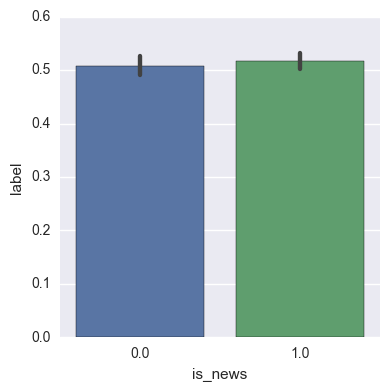

In [11]:
#let's also visualise this
print(data.groupby('is_news')[['label']].mean())
sns.factorplot(x='is_news', y='label', data=data, kind='bar')
#as you can see, there's pretty much as many 'green' news pieces as there are 'non-green' pieces
#moving on!

#### Does the website category effect green-ness?

                       label
alchemy_category            
?                   0.502135
arts_entertainment  0.371945
business            0.711364
computer_internet   0.246622
culture_politics    0.457726
gaming              0.368421
health              0.573123
law_crime           0.419355
recreation          0.684296
religion            0.416667
science_technology  0.456747
sports              0.205263
unknown             0.333333
weather             0.000000


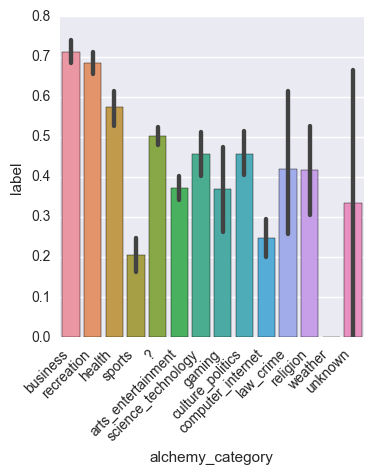

In [12]:
print(data.groupby('alchemy_category')[['label']].mean())
sb.factorplot(x='alchemy_category', y='label', data=data, kind='bar').set_xticklabels(rotation=45,
                                                                                      horizontalalignment='right')
#it depends!

In [13]:
model = sm.logit(
    "label ~ alchemy_category",
    data = data
).fit()

model.summary()
#green-ness is affected by certain website categories, including arts and entertainment, computers, business, health, recreation,and sports

         Current function value: 0.649452
         Iterations: 35


/Users/rb/anaconda/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.7-x86_64.egg/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7381
Method:                           MLE   Df Model:                           13
Date:                Mon, 27 Mar 2017   Pseudo R-squ.:                 0.06256
Time:                        14:41:45   Log-Likelihood:                -4802.7
converged:                      False   LL-Null:                       -5123.2
                                        LLR p-value:                1.372e-128
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  0.0085      0.041      0.207      0.836      -0.072       0.090
alchemy_category[T.arts_entertainment]    -0.5324      0.079     -6.731      0.000      -0.687      -0.377
alchemy_category[T.business]               0.8935      0.085     10.499      0.000       0.727       1.060
alchemy_category[T.computer_internet]     -1.1253      0.141     -7.979      0.000      -1.402      -0.849
alchemy_category[T.culture_politics]      -0.1780      0.116     -1.535      0.125      -0.405       0.049
alchemy_category[T.gaming]                -0.5475      0.241     -2.269      0.023      -1.021      -0.074
alchemy_category[T.health]                 0.2861      0.099      2.892      0.004       0.092       0.480
alchemy_category[T.law_crime]             -0.3340      0.366     -0.912      0.362      -1.052       0.384
alchemy_category[T.recreation]             0.7650      0.074     10.340      0.000       0.620       0.910
alchemy_category[T.religion]              -0.3450      0.243     -1.422      0.155      -0.820       0.130
alchemy_category[T.science_technology]    -0.1820      0.125     -1.455      0.146      -0.427       0.063
alchemy_category[T.sports]                -1.3623      0.134    -10.199      0.000      -1.624      -1.100
alchemy_category[T.unknown]               -0.7017      0.867     -0.809      0.418      -2.401       0.998
alchemy_category[T.weather]              -18.1423   4331.844     -0.004      0.997   -8508.400    8472.115
==========================================================================================================
"""

#### Does the image ratio effect green-ness?

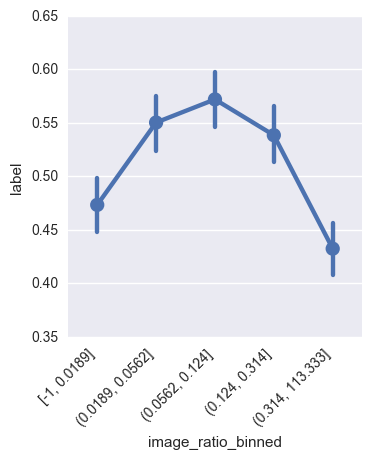

In [17]:
data['image_ratio_binned'] = pd.qcut(data['image_ratio'], 5) #let's create 5 bins for image_ratio data
sns.factorplot('image_ratio_binned', 'label', data = data).set_xticklabels(rotation=45, 
                                                                          horizontalalignment='right') #and then plot that
#factor plots are a great way of looking at categorical data: http://seaborn.pydata.org/tutorial/categorical.html

In [18]:
model = sm.logit(
    "label ~ image_ratio",
    data = data
).fit()

model.summary()
#hm, that p-value is really not significant

Optimization terminated successfully.
         Current function value: 0.692631
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7393
Method:                           MLE   Df Model:                            1
Date:                Mon, 27 Mar 2017   Pseudo R-squ.:               0.0002325
Time:                        14:57:30   Log-Likelihood:                -5122.0
converged:                       True   LL-Null:                       -5123.2
                                        LLR p-value:                    0.1228
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0590      0.024      2.499      0.012       0.013       0.105
image_ratio    -0.0210      0.015     -1.400      0.161      -0.051       0.008
===============================================================================
"""

#### Fit a logistic regression model using statsmodels
- Test different features that may be valuable
- Examine the coefficients, does the feature increase or decrease the effect of being evergreen?

In [20]:
model = sm.logit(
    "label ~ html_ratio + numberOfLinks + spelling_errors_ratio",
    data = data
).fit()

model.summary()
#number of links and spelling errors ratio are both statistically significant
#on the other hand, the number of links has a teeeeeeeeeny increase in log-odds, and spelling errors have a
#decrease in log odds (which makes sense)

Optimization terminated successfully.
         Current function value: 0.687354
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7391
Method:                           MLE   Df Model:                            3
Date:                Mon, 27 Mar 2017   Pseudo R-squ.:                0.007849
Time:                        15:07:54   Log-Likelihood:                -5083.0
converged:                       True   LL-Null:                       -5123.2
                                        LLR p-value:                 2.486e-17
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.1263      0.145      0.873      0.383      -0.157       0.410
html_ratio               -0.4115      0.518     -0.794      0.427      -1.427       0.604
numberOfLinks             0.0010      0.000      5.619      0.000       0.001       0.001
spelling_errors_ratio    -1.5523      0.317     -4.899      0.000      -2.173      -0.931
=========================================================================================
"""

#### Fit a logistic regression model using statsmodels with text features
- Add text features that may be useful, add this to the model and see if they improve the fit
- Examine the coefficients, does the feature increase or decrease the effect of being evergreen?

In [22]:
# EXAMPLE text feature 'recipe'
data['is_recipe'] = data['title'].fillna('').str.contains('recipe')

model = sm.logit("label ~ html_ratio + numberOfLinks + spelling_errors_ratio + is_recipe", data=data).fit()
model.summary()

# is_recipe[T.True] 2.0739 - huge increase in log-odds due to this feature

Optimization terminated successfully.
         Current function value: 0.672177
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7390
Method:                           MLE   Df Model:                            4
Date:                Mon, 27 Mar 2017   Pseudo R-squ.:                 0.02976
Time:                        15:10:47   Log-Likelihood:                -4970.8
converged:                       True   LL-Null:                       -5123.2
                                        LLR p-value:                 9.534e-65
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.0423      0.145     -0.292      0.771      -0.327       0.242
is_recipe[T.True]         2.0739      0.174     11.932      0.000       1.733       2.415
html_ratio               -0.0106      0.520     -0.020      0.984      -1.030       1.009
numberOfLinks             0.0009      0.000      5.210      0.000       0.001       0.001
spelling_errors_ratio    -1.3919      0.317     -4.395      0.000      -2.013      -0.771
=========================================================================================
"""

In [23]:
data['is_tip'] = data['body'].fillna('').str.contains('tip')
data['is_cat'] = data['body'].fillna('').str.contains('cat')
data['is_dog'] = data['body'].fillna('').str.contains('dog')
data['is_puppy'] = data['body'].fillna('').str.contains('puppy')
data['is_baby'] = data['body'].fillna('').str.contains('baby')
data['is_kitten'] = data['body'].fillna('').str.contains('kitten')

In [24]:
model = sm.logit(
    "label ~ is_kitten + is_tip + is_cat + is_baby + is_dog + is_puppy",
    data = data
).fit()

model.summary()

         Current function value: 0.685856
         Iterations: 35


/Users/rb/anaconda/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.7-x86_64.egg/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7388
Method:                           MLE   Df Model:                            6
Date:                Mon, 27 Mar 2017   Pseudo R-squ.:                 0.01001
Time:                        15:13:03   Log-Likelihood:                -5071.9
converged:                      False   LL-Null:                       -5123.2
                                        LLR p-value:                 7.247e-20
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0695      0.028      2.483      0.013       0.015       0.124
is_kitten[T.True]   -18.0596   4578.428     -0.004      0.997   -8991.614    8955.495
is_tip[T.True]        0.5124      0.074      6.961      0.000       0.368       0.657
is_cat[T.True]       -0.3489      0.056     -6.283      0.000      -0.458      -0.240
is_baby[T.True]       0.5102      0.134      3.812      0.000       0.248       0.772
is_dog[T.True]       -0.3184      0.145     -2.193      0.028      -0.603      -0.034
is_puppy[T.True]      0.2006      0.780      0.257      0.797      -1.327       1.728
=====================================================================================
"""

Dog and cat decrease evergreen-ness. Baby and tip increase it. Puppy and kitten are statistically insignificant. 

Nothing in our world makes sense anymore.